In [16]:
# Dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [17]:
# File to Load
Physicians = "../Physicians/Resources/Physicians.csv"
population_data = "../Physicians/Resources/population.csv"

In [18]:
# read physicians File and store into Pandas DataFrames
physicians = pd.read_csv(Physicians)

physicians.head()

,Census division name,Census subdivision name,Family Medicine,Specialist
0,Algoma,"Algoma, Unorganized, North Part",1,NaN
1,Algoma,Blind River,8,1.0
2,Algoma,Elliot Lake,16,2.0
3,Algoma,Garden River 14,1,NaN
4,Algoma,Hornepayne,3,NaN


In [19]:
#read physicians File and store into Pandas DataFrames
population = pd.read_csv(population_data)
population

,Unnamed: 0,Economic region code,Economic region name,Census division code,Census division name,Census subdivision code,Census subdivision name,Total Population,Total Private Dwellings,Population density (people/square km),...,Total owned and rented households >0 income,<30 percent of income spent on shelter,>=30 percent of income spent on shelter,30 - <100 percent of income spent on shelter,Total commuting duration,Commute <15 min,Commute 15-29 min,Commute 30-44 min,Commute 45-59 min,Commute >=60 min
0,0,3510.0,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501005,South Glengarry,13330.0,5848.0,22.0,...,5160.0,4500.0,660.0,605.0,4945.0,1485.0,2030.0,825.0,250.0,360.0
1,1,3510.0,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501007,Akwesasne (Part) 59,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3510.0,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501011,South Stormont,13570.0,5583.0,30.3,...,5295.0,4725.0,570.0,505.0,5510.0,1355.0,2660.0,775.0,275.0,435.0
3,3,3510.0,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501012,Cornwall,47845.0,22214.0,777.9,...,21315.0,16605.0,4705.0,4455.0,15700.0,9380.0,4145.0,910.0,345.0,925.0
4,4,3510.0,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501020,South Dundas,11044.0,4821.0,21.2,...,4490.0,3860.0,625.0,580.0,3895.0,1170.0,970.0,760.0,465.0,530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,3595.0,Northwest,3560,"Kenora, District (DIS)",3560096,Kasabonika Lake,1060.0,252.0,10.4,...,0.0,0.0,0.0,0.0,280.0,260.0,15.0,10.0,0.0,0.0
573,573,3595.0,Northwest,3560,"Kenora, District (DIS)",3560097,Muskrat Dam Lake,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,574,3595.0,Northwest,3560,"Kenora, District (DIS)",3560098,Kingfisher Lake 1,511.0,127.0,56.0,...,0.0,0.0,0.0,0.0,180.0,170.0,10.0,10.0,0.0,0.0
575,575,3595.0,Northwest,3560,"Kenora, District (DIS)",3560100,Wawakapewin,16.0,14.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#merge physicians & population dataframes
final_data_with_population = pd.merge(physicians,population,how='left',on="Census subdivision name")
final_data_with_population

,Census division name_x,Census subdivision name,Family Medicine,Specialist,Unnamed: 0,Economic region code,Economic region name,Census division code,Census division name_y,Census subdivision code,...,Total owned and rented households >0 income,<30 percent of income spent on shelter,>=30 percent of income spent on shelter,30 - <100 percent of income spent on shelter,Total commuting duration,Commute <15 min,Commute 15-29 min,Commute 30-44 min,Commute 45-59 min,Commute >=60 min
0,Algoma,"Algoma, Unorganized, North Part",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algoma,Blind River,8,1.0,440.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557038.0,...,1590.0,1380.0,205.0,200.0,1130.0,755.0,210.0,55.0,55.0,55.0
2,Algoma,Elliot Lake,16,2.0,443.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557041.0,...,5815.0,4655.0,1155.0,1105.0,2645.0,1960.0,305.0,120.0,95.0,165.0
3,Algoma,Garden River 14,1,NaN,450.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557074.0,...,0.0,0.0,0.0,0.0,335.0,170.0,90.0,45.0,10.0,15.0
4,Algoma,Hornepayne,3,NaN,460.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557096.0,...,440.0,375.0,65.0,45.0,440.0,350.0,75.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,York,Markham,287,279.0,96.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519036.0,...,110140.0,74020.0,36120.0,30475.0,89280.0,15220.0,30635.0,24575.0,9200.0,9650.0
288,York,Newmarket,127,253.0,100.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519048.0,...,30200.0,22200.0,8000.0,7170.0,28345.0,8520.0,6855.0,6355.0,3385.0,3225.0
289,York,Richmond Hill,222,265.0,97.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519038.0,...,68925.0,43350.0,25570.0,20820.0,55290.0,9145.0,17865.0,16055.0,5975.0,6250.0
290,York,Vaughan,292,198.0,95.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519028.0,...,103545.0,74660.0,28885.0,25505.0,100805.0,20325.0,35340.0,26770.0,9590.0,8780.0


In [21]:
#Remove NaN to get clean data
df = final_data_with_population.dropna()
df

,Census division name_x,Census subdivision name,Family Medicine,Specialist,Unnamed: 0,Economic region code,Economic region name,Census division code,Census division name_y,Census subdivision code,...,Total owned and rented households >0 income,<30 percent of income spent on shelter,>=30 percent of income spent on shelter,30 - <100 percent of income spent on shelter,Total commuting duration,Commute <15 min,Commute 15-29 min,Commute 30-44 min,Commute 45-59 min,Commute >=60 min
1,Algoma,Blind River,8,1.0,440.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557038.0,...,1590.0,1380.0,205.0,200.0,1130.0,755.0,210.0,55.0,55.0,55.0
2,Algoma,Elliot Lake,16,2.0,443.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557041.0,...,5815.0,4655.0,1155.0,1105.0,2645.0,1960.0,305.0,120.0,95.0,165.0
7,Algoma,Sault Ste. Marie,98,92.0,445.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557061.0,...,32415.0,27195.0,5215.0,4950.0,23980.0,15710.0,6655.0,940.0,250.0,420.0
11,Brant,Brant,11,1.0,146.0,3550.0,Hamilton-Niagara Peninsula,3529.0,"Brant, Census division (CDR)",3529005.0,...,13820.0,11795.0,2025.0,1815.0,14825.0,3925.0,5745.0,2745.0,1225.0,1185.0
12,Brant,Brantford,130,116.0,147.0,3550.0,Hamilton-Niagara Peninsula,3529.0,"Brant, Census division (CDR)",3529006.0,...,41570.0,32250.0,9320.0,8700.0,38205.0,15815.0,10315.0,6310.0,2980.0,2785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,York,Markham,287,279.0,96.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519036.0,...,110140.0,74020.0,36120.0,30475.0,89280.0,15220.0,30635.0,24575.0,9200.0,9650.0
288,York,Newmarket,127,253.0,100.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519048.0,...,30200.0,22200.0,8000.0,7170.0,28345.0,8520.0,6855.0,6355.0,3385.0,3225.0
289,York,Richmond Hill,222,265.0,97.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519038.0,...,68925.0,43350.0,25570.0,20820.0,55290.0,9145.0,17865.0,16055.0,5975.0,6250.0
290,York,Vaughan,292,198.0,95.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519028.0,...,103545.0,74660.0,28885.0,25505.0,100805.0,20325.0,35340.0,26770.0,9590.0,8780.0


In [22]:
# remove duplicate from Economic region
clean_data =df.drop_duplicates()
clean_data

,Census division name_x,Census subdivision name,Family Medicine,Specialist,Unnamed: 0,Economic region code,Economic region name,Census division code,Census division name_y,Census subdivision code,...,Total owned and rented households >0 income,<30 percent of income spent on shelter,>=30 percent of income spent on shelter,30 - <100 percent of income spent on shelter,Total commuting duration,Commute <15 min,Commute 15-29 min,Commute 30-44 min,Commute 45-59 min,Commute >=60 min
1,Algoma,Blind River,8,1.0,440.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557038.0,...,1590.0,1380.0,205.0,200.0,1130.0,755.0,210.0,55.0,55.0,55.0
2,Algoma,Elliot Lake,16,2.0,443.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557041.0,...,5815.0,4655.0,1155.0,1105.0,2645.0,1960.0,305.0,120.0,95.0,165.0
7,Algoma,Sault Ste. Marie,98,92.0,445.0,3590.0,Northeast,3557.0,"Algoma, District (DIS)",3557061.0,...,32415.0,27195.0,5215.0,4950.0,23980.0,15710.0,6655.0,940.0,250.0,420.0
11,Brant,Brant,11,1.0,146.0,3550.0,Hamilton-Niagara Peninsula,3529.0,"Brant, Census division (CDR)",3529005.0,...,13820.0,11795.0,2025.0,1815.0,14825.0,3925.0,5745.0,2745.0,1225.0,1185.0
12,Brant,Brantford,130,116.0,147.0,3550.0,Hamilton-Niagara Peninsula,3529.0,"Brant, Census division (CDR)",3529006.0,...,41570.0,32250.0,9320.0,8700.0,38205.0,15815.0,10315.0,6310.0,2980.0,2785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,York,Markham,287,279.0,96.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519036.0,...,110140.0,74020.0,36120.0,30475.0,89280.0,15220.0,30635.0,24575.0,9200.0,9650.0
288,York,Newmarket,127,253.0,100.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519048.0,...,30200.0,22200.0,8000.0,7170.0,28345.0,8520.0,6855.0,6355.0,3385.0,3225.0
289,York,Richmond Hill,222,265.0,97.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519038.0,...,68925.0,43350.0,25570.0,20820.0,55290.0,9145.0,17865.0,16055.0,5975.0,6250.0
290,York,Vaughan,292,198.0,95.0,3530.0,Toronto,3519.0,"York, Regional municipality (RM)",3519028.0,...,103545.0,74660.0,28885.0,25505.0,100805.0,20325.0,35340.0,26770.0,9590.0,8780.0


In [23]:
# number of Family medicine per economic region name (group by Economic region name)
family_physician = clean_data['Family Medicine'].groupby(clean_data['Economic region name']).sum()
family_physician

Economic region name
 Hamilton-Niagara Peninsula    1110
 Kingston-Pembroke              547
 Kitchener-Waterloo-Barrie     1294
 London                         675
 Muskoka-Kawarthas              956
 Northeast                      542
 Northwest                      161
 Ottawa                        1716
 Stratford-Bruce Peninsula      211
 Toronto                       6544
 Windsor-Sarnia                 538
Name: Family Medicine, dtype: int64

In [24]:
# number of specialist per economic region name (group by Economic region name)
specialist = clean_data['Specialist'].groupby(clean_data['Economic region name']).sum()
specialist


Economic region name
 Hamilton-Niagara Peninsula    1819.0
 Kingston-Pembroke              742.0
 Kitchener-Waterloo-Barrie     1073.0
 London                        1198.0
 Muskoka-Kawarthas             1545.0
 Northeast                      479.0
 Northwest                      259.0
 Ottawa                        2154.0
 Stratford-Bruce Peninsula      189.0
 Toronto                       8533.0
 Windsor-Sarnia                 524.0
Name: Specialist, dtype: float64

In [25]:
#total population per Economic region
total_population = clean_data['Total Population'].groupby(clean_data['Economic region name']).sum()
total_population

Economic region name
 Hamilton-Niagara Peninsula    1222822.0
 Kingston-Pembroke              379107.0
 Kitchener-Waterloo-Barrie     1141285.0
 London                         599721.0
 Muskoka-Kawarthas              309893.0
 Northeast                      401033.0
 Northwest                       39275.0
 Ottawa                        1210039.0
 Stratford-Bruce Peninsula      135750.0
 Toronto                       6102781.0
 Windsor-Sarnia                 571961.0
Name: Total Population, dtype: float64

In [26]:
#physician population ratio for economic region
physician_population_ratio = family_physician/total_population*1000
physician_population_ratio

Economic region name
 Hamilton-Niagara Peninsula    0.907736
 Kingston-Pembroke             1.442864
 Kitchener-Waterloo-Barrie     1.133810
 London                        1.125523
 Muskoka-Kawarthas             3.084936
 Northeast                     1.351510
 Northwest                     4.099300
 Ottawa                        1.418136
 Stratford-Bruce Peninsula     1.554328
 Toronto                       1.072298
 Windsor-Sarnia                0.940624
dtype: float64

In [27]:
# creat new data frame with required columns for analysis
physician_count= pd.DataFrame({"Total Population":total_population,
                                  "specialist per Economic region ":specialist,
                                  "family_physician per Economic region" : family_physician,
                               "Physician_Population_ratio":physician_population_ratio,})
physician_count

,Total Population,specialist per Economic region,family_physician per Economic region,Physician_Population_ratio
Economic region name,,,,
Hamilton-Niagara Peninsula,1222822.0,1819.0,1110,0.907736
Kingston-Pembroke,379107.0,742.0,547,1.442864
Kitchener-Waterloo-Barrie,1141285.0,1073.0,1294,1.133810
London,599721.0,1198.0,675,1.125523
Muskoka-Kawarthas,309893.0,1545.0,956,3.084936
Northeast,401033.0,479.0,542,1.351510
Northwest,39275.0,259.0,161,4.099300
Ottawa,1210039.0,2154.0,1716,1.418136
Stratford-Bruce Peninsula,135750.0,189.0,211,1.554328


In [28]:
#reset index to numeric value
physician_index = physician_count.reset_index()
physician_index

,Economic region name,Total Population,specialist per Economic region,family_physician per Economic region,Physician_Population_ratio
0,Hamilton-Niagara Peninsula,1222822.0,1819.0,1110,0.907736
1,Kingston-Pembroke,379107.0,742.0,547,1.442864
2,Kitchener-Waterloo-Barrie,1141285.0,1073.0,1294,1.133810
3,London,599721.0,1198.0,675,1.125523
4,Muskoka-Kawarthas,309893.0,1545.0,956,3.084936
5,Northeast,401033.0,479.0,542,1.351510
6,Northwest,39275.0,259.0,161,4.099300
7,Ottawa,1210039.0,2154.0,1716,1.418136
8,Stratford-Bruce Peninsula,135750.0,189.0,211,1.554328
9,Toronto,6102781.0,8533.0,6544,1.072298


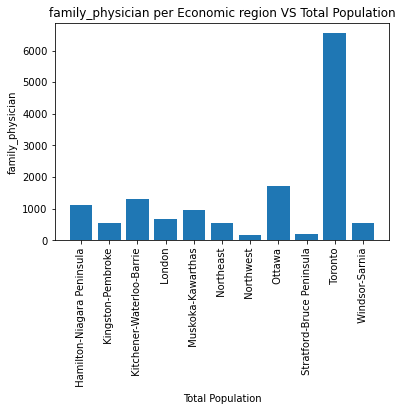

In [31]:
x_axis = physician_index["Economic region name"]
y_axis = physician_index["family_physician per Economic region"]
plt.bar(x_axis,y_axis,align='center')
plt.xlabel("Total Population")
plt.ylabel("family_physician")
plt.title("family_physician per Economic region VS Total Population")
plt.xticks(rotation="vertical")
plt.savefig("../Physicians/phys_population.png")
plt.show()

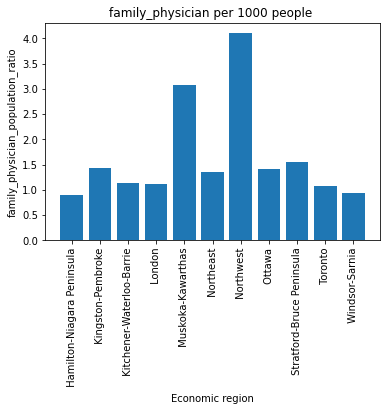

In [32]:
#bar chart showing family_physician_population_ratio per economic region
x_axis =physician_index ["Economic region name"]
y_axis =physician_index ["Physician_Population_ratio"]
plt.bar(x_axis,y_axis,align='center')
plt.xlabel("Economic region")
plt.ylabel("family_physician_population_ratio")
plt.title("family_physician per 1000 people ")
plt.xticks(rotation="vertical")
plt.savefig("../Physicians/physician.png")
plt.show()